# StyleFusion example


StyleFusionSimple is a small class that allows quick and simple image synthesis using StyleFusion.  
We suggest looking into it's code if you are looking for more flexibility.

The weights for the StyleFusion model can be found here: https://drive.google.com/drive/folders/1i532291vezBZQTRksqqdUFecFPHqrSgz?usp=sharing  
Put them in the 'weights' directory.  
If you put the weights elsewhere make sure the pathes in 'weights/ffhq_weights.json' refer to the actual location of the weights.

In [1]:
import torch
from matplotlib import pyplot as plt
from style_fusion_simple import StyleFusionSimple, tensor2im

ffhq_drawer = StyleFusionSimple("ffhq", "../stylegan2-ffhq-config-f.pt", "weights/ffhq_weights.json")
car_drawer = StyleFusionSimple("car", "../stylegan2-car-config-f.pt", "weights/car_weights.json")
church_drawer = StyleFusionSimple("church", "../stylegan2-church-config-f.pt", "weights/church_weights.json")

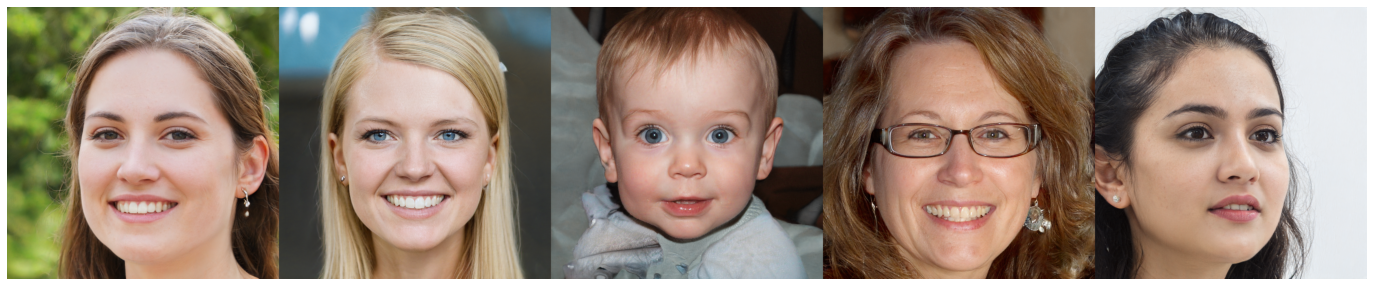

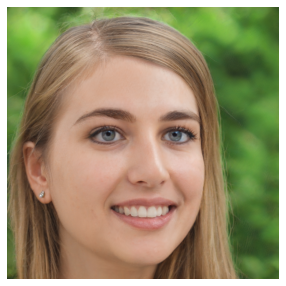

In [2]:
z_mouth = ffhq_drawer.seed_to_z((6, 7))
z_background = ffhq_drawer.seed_to_z((23, 8))
z_hair = ffhq_drawer.seed_to_z((334,6))
z_eyes = ffhq_drawer.seed_to_z((337, 5))
z_global = ffhq_drawer.seed_to_z((393, 5))

with torch.no_grad():
    I_background = ffhq_drawer.generate_img(z_background)
    I_hair = ffhq_drawer.generate_img(z_hair)
    I_eyes = ffhq_drawer.generate_img(z_eyes)
    I_mouth = ffhq_drawer.generate_img(z_mouth)
    I_global = ffhq_drawer.generate_img(z_global)
    I_fused = ffhq_drawer.generate_img(z_global, hair=z_hair, eyes=z_eyes, background=z_background, mouth=z_mouth)

plt.figure(figsize=(5 * 5, 5))
plt.axis('off')
plt.imshow(tensor2im(torch.cat([I_background, I_hair, I_eyes, I_mouth, I_global], dim=2)))
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(tensor2im(I_fused))

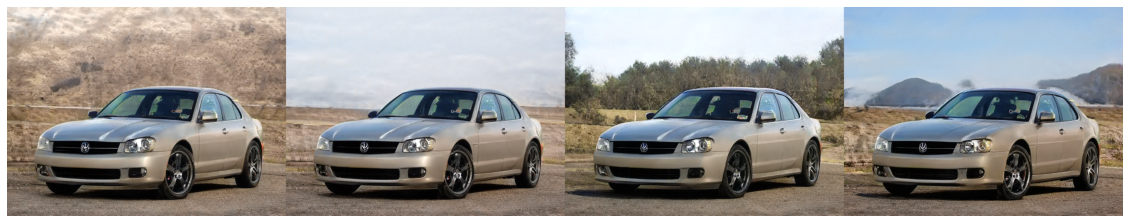

In [3]:
w1 = car_drawer.z_to_w_plus(car_drawer.seed_to_z((353, 7)))
w2 = car_drawer.z_to_w_plus(car_drawer.seed_to_z((404, 2)))
w3 = car_drawer.z_to_w_plus(car_drawer.seed_to_z((320, 6)))
w4 = car_drawer.z_to_w_plus(car_drawer.seed_to_z((322, 8)))

with torch.no_grad():
    I1 = car_drawer.generate_img(w1, latents_type="w+")
    I2 = car_drawer.generate_img(w1, bg_top=w2, latents_type="w+")
    I3 = car_drawer.generate_img(w1, bg_top=w3, latents_type="w+")
    I4 = car_drawer.generate_img(w1, bg_top=w4, latents_type="w+")

plt.figure(figsize=(5 * 4, 5))
plt.axis('off')
plt.imshow(tensor2im(torch.cat([I2, I3, I4, I1], dim=2)[:,64:448]))

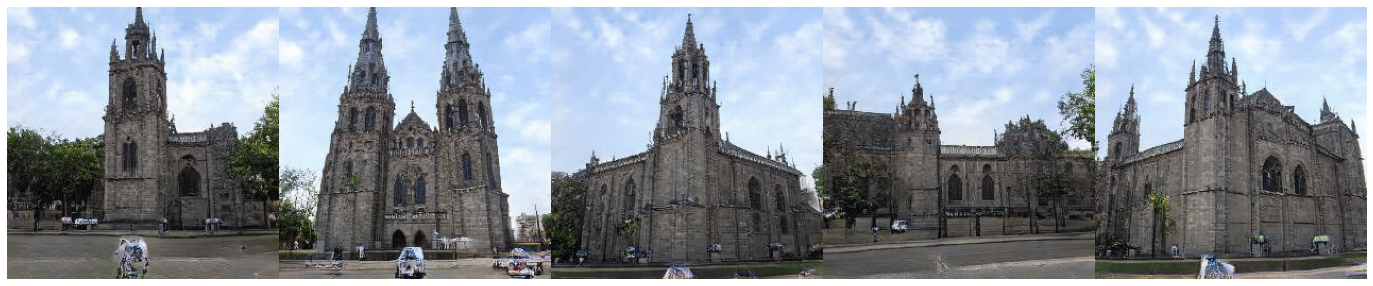

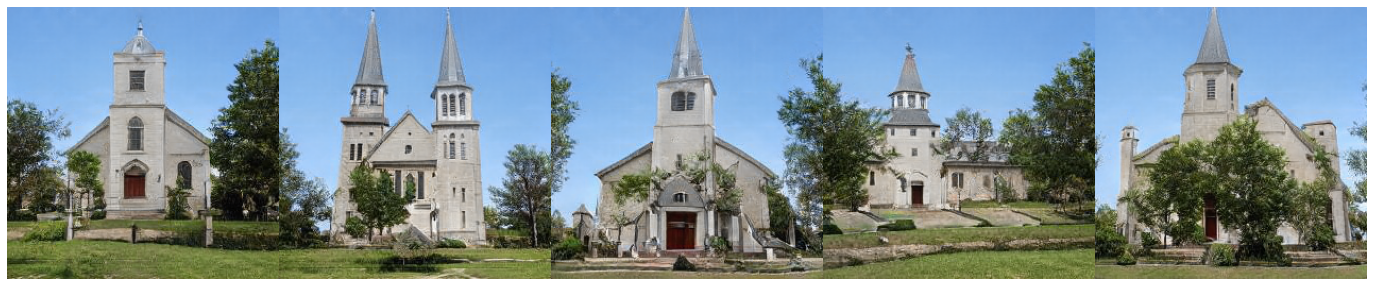

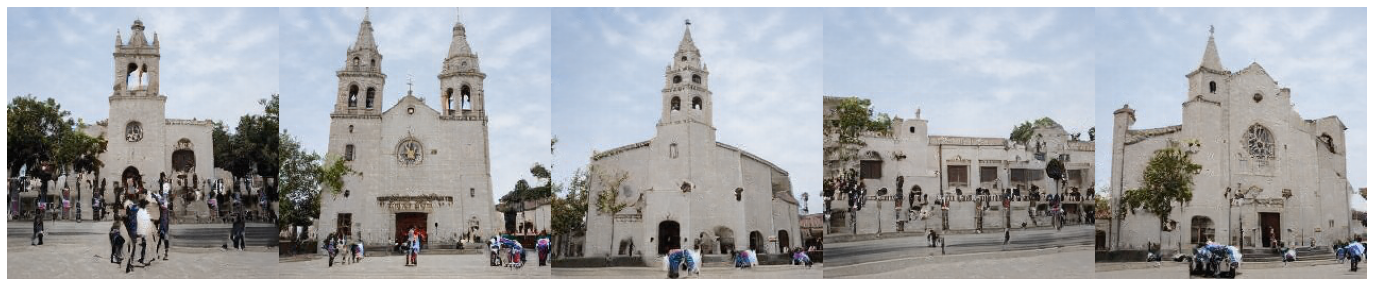

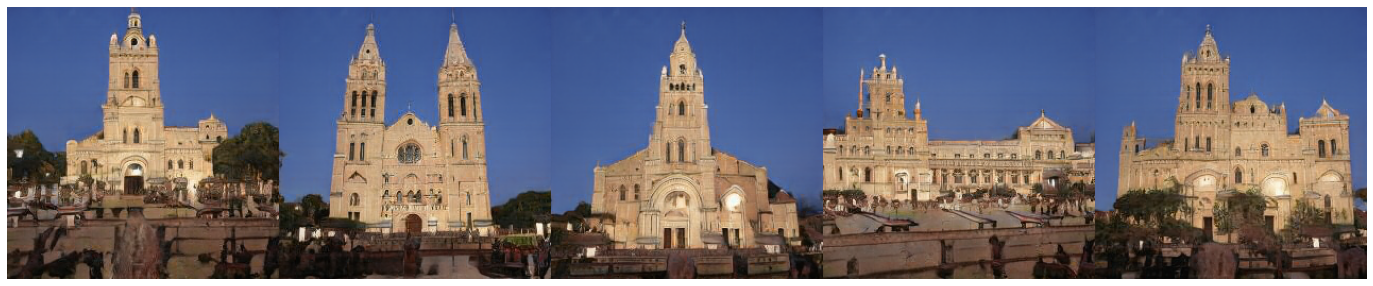

In [4]:
z_church = [church_drawer.z_to_s(church_drawer.seed_to_z(seed)) for seed in [(18, 3), (22, 0), (27, 3), (33, 3)]]
z_global = [church_drawer.z_to_s(church_drawer.seed_to_z(seed)) for seed in [(5, 9), (6, 6), (15, 8), (0, 5), (17, 3)]]

rows = []
with torch.no_grad():
    for c in z_church:
        rows.append([church_drawer.generate_img(c, all=g, latents_type="s") for g in z_global])

for row in rows:
    plt.figure(figsize=(5 * 5, 5))
    plt.axis('off')
    plt.imshow(tensor2im(torch.cat(row, dim=2)))